---
---
# Introducción a series temporales

En esta sección, estudiaremos un tipo muy específico de información que viene proporcionada de forma serializada; es decir, distribuída en el tiempo. Es por tanto imprescindible tener en cuenta el orden de los elementos para poder abordar el estudio con ciertas garantías. Para comenzar nuestra andadura, haremos un breve repaso de conceptos fundamentales, que han sido extraídos parcialmente de las [notas de Jan Grandell](https://www.math.kth.se/matstat/gru/sf2943/ts.pdf).

---
##Preliminares

En un contexto formal, podríamos decir que una muestra empírica de datos $\{x_t\}_{t\in T}$ es una evidencia de una distribución conjunta de variables aleatorias $\{X_t\}_{t\in T}$. A pesar de que estas muestras son finitas, a la hora de dar un marco general a las mismas es conveniente considerar una colección infinita de ellas, a lo que llamaremos **proceso estocástico**. Ello nos lleva al estudio de distribuciones de probabilidad conjuntas del tipo

$$P[X_1\leq x_1,\ldots,X_n\leq x_n],\quad \forall n\in\mathbb{N}$$

Esto induce hablar, dado un proceso estocástico $\{X_t\}_{t\in T}$, de la **familia de distribuciones de probabilidad** asociadas, definida precisamente por 

$$F_{\mathbf{t}}(\mathbf{x})=P[X_1\leq x_1,\ldots,X_n\leq x_n],\quad \mathbf{t}\in \mathcal{T}$$

donde $\mathcal{T}=\{(t_1,\ldots,t_n)\in T^n : t_1< t_2<\ldots< t_n,\, n = 1,2,\ldots\}$. El recíproco (es decir, estudiar si una familia de funciones se corresponde a distribuciones de un proceso estocástico) viene caracterizado bajo una restricción en el conocido *teorema de existencia de Kolmogorov*.

* Ejemplo 1 (Distribuciones binarias): Supongamos que nuestro proceso consiste en lanzar repetidamente una moneda al aire y observar su resultado. Para cada lanzamiento, tendremos que bien el resultado es cara (*-1*), o bien cruz (*1*), con iguales posibilidades; esto es,
$$P[X_n=-1]=P[X_n=1]=\frac{1}{2},\quad n\in\mathbb{N}$$
Es decir, individualmente cada proceso se modela con una distribución $\mathcal{B}(\frac{1}{2})$, lo que nos lleva por reproductividad e independencia de los lanzamientos a que
$$P[X_1= x_1,\ldots,X_n= x_n]=2^{-n},\quad \forall n\in\mathbb{N}$$
donde cada $x_t$  es *-1* ó *1*.

* Ejemplo 2 (*White noise*): Un proceso $\{X_t,\,t\in\mathbb{Z}\}$ se dice que es un *Independent Identically Distributed (IID) noise* con media $0$ y varianza $\sigma^2$ cuando todas esas variables cumplen que $\mathbb{E}[X_t]=0$ y $\text{Var}[X_t]=\sigma^2$. Es claro ahora que el ejemplo 1 no es más que un caso concreto del ejemplo 2 con $\sigma=1$.

Analicemos ahora en detalle el ejemplo anteriormente introducido:



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def coin_flip_experiment(size):
  '''
  Dado un número entero, realiza un número de simulaciones de lanzamiento de dados igual a dicho número, y devuelve la media y varianza de dicho fenómeno
  '''
  #Un poco de control sobre la entrada...
  if (type(size)!=int):
    raise ValueError('El valor introducido no es un número natural.')
  #Simulamos
  results = 2*np.random.binomial(n = 1, p = .5, size = size)-1
  return np.mean(results), np.std(results)

In [3]:
#Fijamos iteraciones
iter = 200
lag = 3
#Definimos variables
x = range(lag,iter+lag)
mu = np.zeros(iter)
sigma = np.zeros(iter)
#Iteramos para obtener resultados
for i in x:
  mu[i-lag], sigma[i-lag] = coin_flip_experiment(i)

Text(0.5, 1.0, 'Evolución de la media')

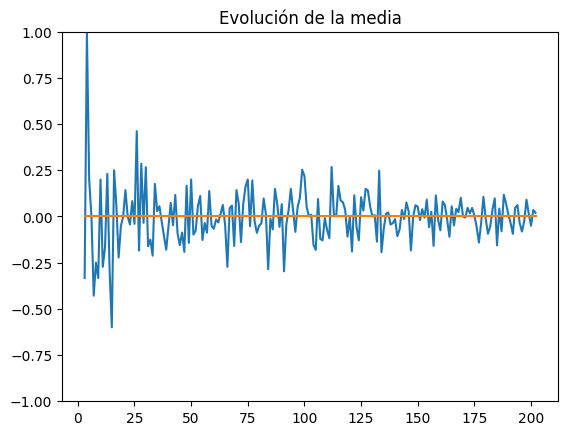

In [4]:
#Dibujamos media
plt.plot(x,mu,x,[0]*iter)
plt.ylim([-1,1])
plt.title('Evolución de la media')

Text(0.5, 1.0, 'Evolución de la varianza')

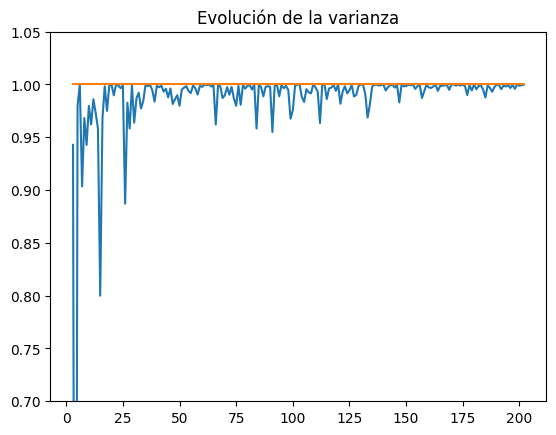

In [5]:
#Dibujamos varianza
plt.plot(x,sigma,x,[1]*iter)
plt.ylim([0.7,1.05])
plt.title('Evolución de la varianza')

Una **serie temporal** se define como un proceso estocástico donde $T\subset \mathbb{Z}$; esto es, donde la indexación de nuestras vv.aa. es entera. A fin de aliviar notación, introducimos ahora dos funciones que nos servirán de utilidad para un proceso estocástico $\{X_t\}_{t\in T}$ con $\text{Var}(X_t)<+\infty$ para cada $t\in T$:

* La función media del proceso se define por $\mu_X(t)=\mathbb{E}[X_t]$.
* La función covarianza de $\{X_t\}_{t\in T}$ se define como $\gamma_X(r,s)=\text{Cov}(X_r,X_s)$.

Pongamos de manifiesto con ejemplos estos conceptos:

* Ejemplo (Movimiento Browiano): Un movimiento browiano, o *proceso de Wiener*, es un proceso estocástico del tipo $\{B(t)\}_{t\in\mathbb{N}\cup\{0\}}$ cumpliendo que:
  *  $B(0)=0$.
  *  Los operadores diferencia son independientes; i.e., $\Delta_n=B(t_n)-B(n_1)$ son vv.aa. independientes.
  *  Si $t\geq s$, $B(t)-B(s)\sim \mathcal{N}(0,t-s)$ (en este caso, $t-s$ hace referencia a la **varianza**).

  Estudiemos la función de covarianza: Dados $r\leq s$,
  $$\gamma_B(r,s)=\text{Cov}(B_r,B_s)=\text{Cov}(B_r,B_s-B_r+B_r) = \text{Cov}(B_r,B_s-B_r)+\text{Cov}(B_r,B_r)=0+r=r$$
  Si no se especifica relación entre $r$ y $s$, $\gamma_B(r,s)=\text{min}(r,s)$.

El ejemplo anterior ofrece una amplia gama de posibilidades, entre las cuales destacamos dos:

* Caminos aleatorios: Son particularmente importantes ya que todo proceso browiano puede verse como límite de caminos aleatorios simples.

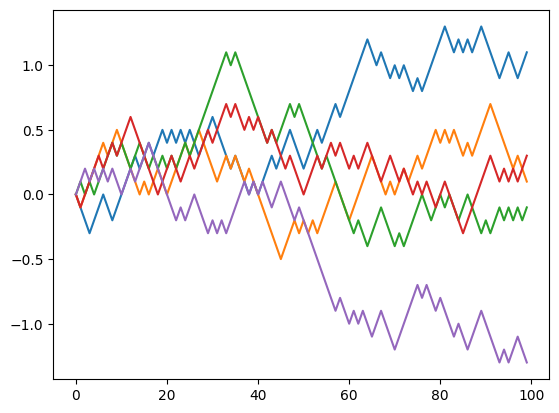

In [6]:
#Método
def gen_random_walk(self,n_step=100):
    """
    Genera un movimiento por caminos aleatorios
    Argumentos:
        n_step: Nº de pasos   
    Salida:
        np.array con los puntos
    """
    # Advertencia sobre la calidad del proceso
    if n_step < 30:
        print("El número de pasos es muy pequeño, puede que no genere una buena secuencia.")
 
    w = np.zeros(n_step)
    
    for i in range(1,n_step):
        # Muestra aleatoria simple con prob. 1/2
        yi = np.random.choice([1,-1])
        # Proceso de Weiner
        w[i] = w[i-1]+(yi/np.sqrt(n_step))
    return w

#Inicializamos
for i in range(5):
  plt.plot(gen_random_walk(1000))
plt.show()

*  *Stock prices*:

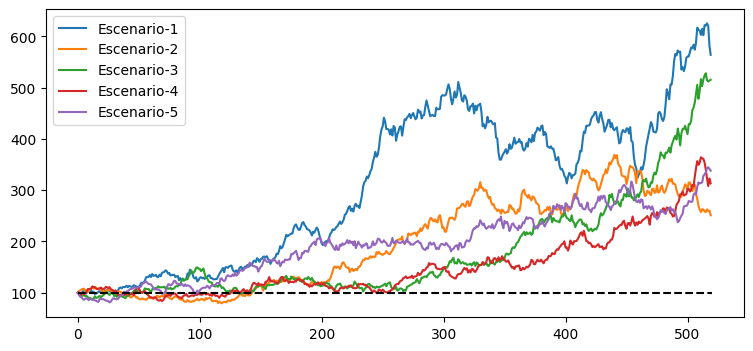

In [7]:
#Método auxiliar
def gen_normal(n_step=100):
    """
    Genera un movimiento a partir de la distribución normal
    Argumentos:
        n_step: Nº de pasos
    Salida:
        A NumPy array
    """
    if n_step < 30:
        print("El número de pasos es muy pequeño, puede que no genere una buena secuencia.")
    
    w = np.zeros(n_step)
    
    for i in range(1,n_step):
        # Muestra normal
        yi = np.random.normal()
        # Proceso de Weiner
        w[i] = w[i-1]+(yi/np.sqrt(n_step))
    
    return w

#Método simulación precios stock
def stock_price(
                s0=100,
                mu=0.2,
                sigma=0.68,
                deltaT=52,
                dt=0.1
                ):
    """
    Modela la evolución de un stock S(t) usando el proceso de Weiner W(t) como
    `S(t) = S(0).exp{(mu-(sigma^2/2).t)+sigma.W(t)}`
    
    Argumentos:
        s0: Valor inicial del stock, por defecto 100
        mu: 'Drift' del stock (hacia arriba o hacia abajo), por defecto 1
        sigma: 'Volatilidad' del stock, por defecto 1
        deltaT: El plazo de tiempo que se quiere computar, por defecto 52
        dt (optional): Granularidad del periodo de tiempo, por defecto 0.1
    
    Salida:
        s: Un NumPy array con las simulaciones de variación del stock en le periodo de tiempo deltaT
    """
    n_step = int(deltaT/dt)
    time_vector = np.linspace(0,deltaT,num=n_step)
    # Variación del stock
    stock_var = (mu-(sigma**2/2))*time_vector
    # Proceso de Weiner
    weiner_process = sigma*gen_normal(n_step)
    s = s0*(np.exp(stock_var+weiner_process))
    
    return s

#Método dibujo
def plot_stock_price(mu,sigma):
    """
    Dibujamos múltiples escenarios de simulación
    """
    plt.figure(figsize=(9,4))
    for i in range(5):
        plt.plot(stock_price(mu=mu,
                               sigma=sigma,
                               dt=0.1))
    plt.legend(['Escenario-'+str(i) for i in range(1,6)],
               loc='upper left')
    plt.hlines(y=100,xmin=0,xmax=520,
               linestyle='--',color='k')
    plt.show()

#Inicializamos
plot_stock_price(mu=0.2,sigma=0.6)

---
## Estacionariedad

En términos laxos, un proceso estocástico es **estacionario** cuando sus propiedades no cambian con el tiempo. Como en el resto de apartados, caracterizaremos estos conceptos a través del análisis de la media y la covarianza de nuestras vv.aa. De forma precisa, se dice que un proceso estocástico $\{X_t\}_{t\in T}$ es (débilmente) estacionario cuando:

* $\text{Var}(X_t)<+\infty$ para todo $t\in T$.
* $\mu_X(t)=\mu$ para todo $t\in T$.
* $\gamma_X(r,s)=\gamma_X(r+t,s+t)$ para todo $r,s,t\in T$.

En particular, la última condición nos dice que $\gamma_X$ es una función de $r-s$, y por tanto tiene sentido definir la función

$$\gamma_X(h):=\gamma_X(h,0)$$

donde el valor $h$ se conoce como *lag*. Esta función será particularmente importante a la hora de estudiar la **similaridad** de un proceso estocástico arbitrario, a través de lo que se conoce como funciones de **autocovarianza** de un proceso estacionario (*ACVF*)

$$\gamma_X (t)=\text{Cov}(X_{t+h},X_t)$$

y la **autocorrelación** del mismo (*ACF*)

$$\rho_X(h)=\frac{\gamma_X(h)}{\gamma_X(0)}$$

* Ejemplo (*White Noise*): Uno de los ejemplos más sencillos, y también uno de los más trascendentes a la hora de descomponer procesos estocásticos, es el del *ruido blanco*. Este consiste simplemente en un proceso $\{X_t\}_{t\in T}$ tal que:
  * $\mathbb{E}[X_t]=\mu$.
  * $\gamma_X(h)=\left\lbrace\begin{array}{ccl}\sigma^2 & \text{si} & h=0\\0 & \text{si} & h\ne 0\end{array}\right.$

  Se denota por $\{X_t\}_{t\in T}\sim\text{WN}(\mu,\sigma^2)$. El caso más inmediato es el de una familia de vv.aa. independientes e idénticamente distribuídas $X_t\sim\mathcal{N}(\mu,\sigma^2)$ para todo $t\in T$.



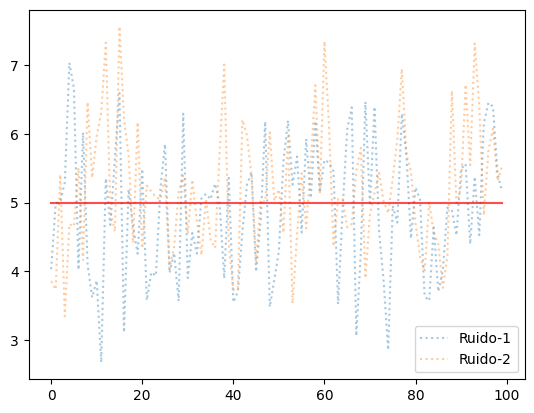

In [8]:
#Método
def gen_white_noise(mu, sigma, n_steps):
  '''
  Genera un ruido blanco a partir de un cierto número de pasos en una distribución normal.
  Atributos: 
    mu (float): Media de la distribución normal asociada
    sigma (float): Desviación típiac de la distribución normal asociada
    n_stes: Pasos del proceso
  Salida: 
    np.array conteniendo los pasos del ruido blanco.
  '''
  if n_steps < 30:
    print("El número de pasos es muy pequeño, puede que no genere una buena secuencia.")
  return sigma*np.random.randn(n_steps)+mu

#Inicializamos
mu = 5
sigma = 1
n_steps = 100
n_sim = 2
for _ in range(n_sim):
  plt.plot(np.arange(n_steps), gen_white_noise(mu, sigma, n_steps), ls = 'dotted', alpha = .4)
plt.plot(np.arange(n_steps), [mu]*n_steps, color = 'red', alpha = .7)
plt.legend(['Ruido-'+str(i) for i in range(1,n_sim+1)])
plt.show()

---
## Tendencia y periodicidad

Centraremos ahora nuestros esfuerzos en ser capaces de, dado un proceso estocástico, *aislar* sus componentes de forma que seamos capaces de extraer de ella un proceso estacionario. 

Consideremos la descomposición canónica

$$X_t = m_t+s_t+Y_t,$$

donde: 

* $m_t$ es la *tendencia* del proceso.
* $s_t$ es la *periodicidad* del proceso.
* $Y_t$ es un proceso estacionario.

Nuestro objetivo es, como anticipábamos, ser capaces de absorber los componentes de tendencia y periodicidad con la intención de que el residuo resultante se comporte como un proceso estocástico estacionario.

### Procesos sin periodicidad

Veamos primero cómo abordar el caso en el que ya nos hemos desprendido de la componente periódica, y por tanto cada elemento del proceso estocástico tiene la forma:

$$X_t = m_t + Y_t$$

Podemos suponer además, sin pérdida de generalidad, que $\mathbb{E}[X_t]=0$ para todo $t\in T$. De nuevo, consideramos sin pérdida de generalidad que $\mathbb{E}[X_t]=0$ para todo $t\in T$.

A continuación, exponemos algunos métodos para hacer estimaciones sobre $m_t$:

* Método 1 (mínimos cuadrados): Si suponemos que $m_t=\sum_{k=0}^n a_k x_t^k$, se trata de minimizar la función objetivo
  $$J_{\{a_k\}_{k=0}^n}(\mathbf{x})=\sum_{t=1}^T \left(x_t-\sum_{k=0}^n a_k \mathbf{t}_{x_t}^k\right)^2=\left|\left|\left(\begin{array}{c}x_0\\x_1\\\vdots\\x_T\end{array}\right)-\left(\begin{array}{cccc}1&t_{x_1}&\ldots&t_{x_1}^n\\1&t_{x_2}&\ldots&t_{x_2}^n\\\vdots&\vdots&\ddots&\vdots\\1&t_{x_T}&\ldots&t_{x_T}^n\end{array}\right)\left(\begin{array}{c}a_0\\a_1\\\vdots\\a_n\end{array}\right)\right|\right|^2=||\mathbf{y}-\mathbf{X}\mathbf{a}||^2$$

La matrix anterior es conocida como _matriz de Vandermonde_, y sus propiedades han sido ampliamente estudiadas. Concretamente, la solución del problema anterior es:

$$\mathbf{\hat{a}}=(\mathbf{X}^t\mathbf{X})^{-1}\mathbf{X}^t\mathbf{y}$$

     Month  Sales
0  2018-01  266.0
1  2018-02  145.9
2  2018-03  183.1
3  2018-04  119.3
4  2018-05  180.3


C:\Users\israe\AppData\Local\Temp\ipykernel_32812\2836948384.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,'Month'] = pd.to_datetime(data['Month'], format = '%Y-%m')


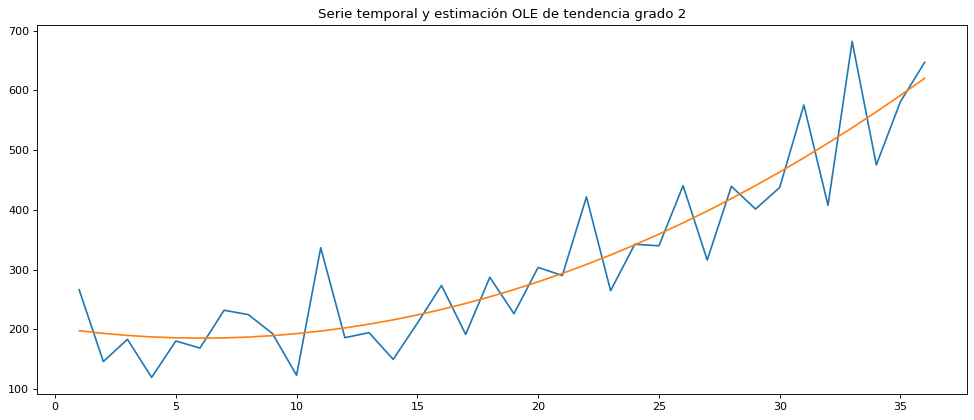

In [9]:
#Fijamos ruta de archivos
path = ''
#Leemos fichero de muestra
data = pd.read_csv(path + 'TimeSeriesSample.txt')
print(data.head())
#Formateamos fecha
data.loc[:,'Month'] = pd.to_datetime(data['Month'], format = '%Y-%m')
data.set_index('Month', inplace = True)
#Obtenemos la solución analítica por mínimos cuadrados de grado N
N = 2
time_array = np.arange(data.shape[0])+1
vander_matrix = np.vander(np.arange(data.shape[0])+1, N = N+1, increasing = True)
analytic_coefficients = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(vander_matrix),vander_matrix)),np.transpose(vander_matrix)),data['Sales'])
analytic_solution = np.matmul(analytic_coefficients,np.transpose(vander_matrix))
#Dibujamos la serie y su aproximación
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(time_array,data['Sales'],time_array,analytic_solution)
plt.title('Serie temporal y estimación OLE de tendencia grado {}'.format(N))
plt.show()

* Método 2 (*moving average*): Sea $q\geq 0$ y consideremos:
$$W_t=\frac{1}{2q+1}\sum_{j=-q}^qX_{t+j},\quad q+1\leq t\leq n-q$$

  De este modo, 
$$W_t=\frac{1}{2q+1}\sum_{j=-q}^qX_{t+j}=\frac{1}{2q+1}\sum_{j=-q}^q m_t + \frac{1}{2q+1}\sum_{j=-q}^q Y_t$$
  siendo esta cantidad cercana a $m_t$ cuando:

  * $q$ sea lo suficientemente pequeño para que $m_t$ sea aproximable linealmente en $[t-q,t+q]$.
  * $q$ sea lo suficientemente grande como para que $\frac{1}{2q+1}\sum_{j=-q}^q Y_t\approx 0$.

  En la práctica, es complicado obtener una estimación del valor de $q$, por lo que se conveniente hacer pruebas sobre el código. Disponemos de las siguientes funciones:
  * *Simple moving average*: $\text{SMA}_t(h)=\frac{1}{h}\sum_{i=0}^{h-1}x_{t+i}$.
  * *Cumulative moving average*: $\text{CMA}(t)=\frac{1}{t}\sum_{i=1}^{t}x_{i}$.
  * *Exponential Moving Average*: $\text{EMA}(0)=x_0$, $\text{EMA}(t)=\alpha x_t+(1-\alpha)\text{EMA}(t-1)$, donde $\alpha$ es el **factor de suavizamiento**.

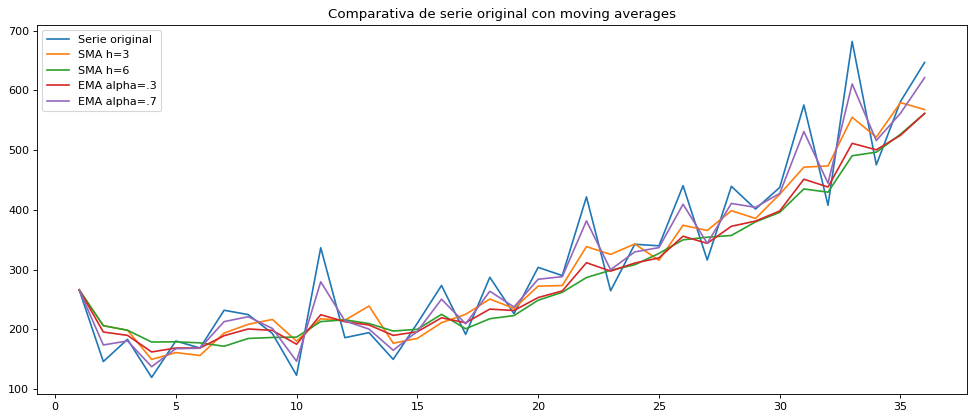

In [10]:
#Las funciones se encuentran ya implementadas en Pandas
min_periods = 1 #Hace referencia a si queremos estimar esos valores entre 1 y t-h+1 reduciendo progresivamente el valor de h
#Dibujamos
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(time_array, data['Sales'], label = 'Serie original')
plt.plot(time_array, data['Sales'].rolling(window = 3, min_periods = min_periods).mean(), label = 'SMA h=3')
plt.plot(time_array, data['Sales'].rolling(window = 6, min_periods = min_periods).mean(), label = 'SMA h=6')
plt.plot(time_array, data['Sales'].ewm(alpha = .3).mean(), label = 'EMA alpha=.3')
plt.plot(time_array, data['Sales'].ewm(alpha = .7).mean(), label = 'EMA alpha=.7')
plt.title('Comparativa de serie original con moving averages')
plt.legend()
plt.show()

* Método 3 (Diferenciación): Definimos el operador diferencia como $\nabla X_t = X_t-X_{t-1}$, y de forma recursiva $\nabla^k X_t=\nabla(\nabla^{k-1} X_t)$. A modo de ejemplo:
$$\nabla^2 X_t=\nabla X_t-\nabla X_{t-1} = X_t-2X_{t-1}+X_{t-2}$$
A la hora de realizar operaciones, sin embargo, parece más eficaz considerar el operador *shift* $(1-B) X_t=\nabla X_t$; así,
$$\nabla^2 X_t=(1-B)^2 X_t=(1-2B+B^2) X_t= X_t-2X_{t-1}+X_{t-2}$$
En términos generales, si suponemos que $m_t\approx \sum_{j=0}^k c_j t^j$, entonces
$$\nabla^k X_t\approx k! c_k + \nabla^k Y_t,$$
que es un proceso estocástico estacionario. En la práctica, aplicando $k=1$ ó $k=2$ es suficiente.

<AxesSubplot:xlabel='Month'>

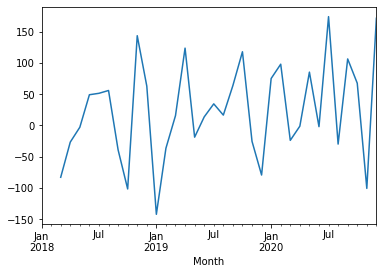

In [11]:
data['Sales'].diff(periods = 2).plot()

### Procesos con periodicidad

Volviendo a la descomposición inicial, donde para cada $t\in T$ tenemos que 
$$X_t = m_t + s_t + Y_t$$
donde, en este caso, además de la hipótesis de independencia $\mathbb{E}[Y_t]=0$, fijamos una periodicidad $d$, de tal manera que:

* $T$ es divisible por $d$ (i.e., contamos un una cantidad exacta de periodos).
* $s_t = s_{t+d}$ para todo $t=0,\ldots,\frac{T}{d}$.
* $\sum_{k=1}^ds_k = 0$.

A fin de obtener una notación más precisa de los elementos del proceso, escribiremos:

$$X_{j,k} = X_{k+d(j-1)},\quad k=1,\ldots,d,\,j=1,\ldots,\frac{T}{d}.$$

Analizaremos dos formas de obtener esta componente:

* Usando el *moving average*: Usaremos las siguientes estimaciones:
  * Si $d$ es par, usamos $q=\frac{d}{2}$ y estimamos
  $$\hat{m}_t=\frac{0.5x_{t-q}+x_{t-q+1}+\ldots+x_{t+q-1}+0.5x_{t+q}}{d},\quad q+1\leq t\leq n-q$$
  * Si $d$ es impar, usamos $q=\frac{d-1}{2}$ y la estimamos
  $$\hat{m}_t=\frac{x_{t-q}+x_{t-q+1}+\ldots+x_{t+q-1}+x_{t+q}}{d},\quad q+1\leq t\leq n-q$$

A fin de estimar ahora $s_k$, calculamos en primer lugar las *desviaciones naturales*:

$$ \omega_k =  \frac{1}{\text{nº sumandos}}\sum_{\frac{q-k}{d}< j\leq \frac{n-(q+k)}{d}}(x_{k+j\cdot d}-\hat{m}_{k+j\cdot d})$$

Finalmente, para que la suma de los estimadores sea cero, basta tomar

$$ \hat{s}_k = \omega_k-\frac{1}{d}\sum-{i=1}^d \omega_i,\quad k=1,\ldots,d$$


---
---
# Introducción práctica a modelos autoregresivos

Un caso particulr del anterior desarrollo se produce cuando un término de una serie temporal cualquiera puede expresarse en términos de $p$ términos anteriores, con sus correspondientes factores y ruidos. Concretamente, estudiaremos el modelo ARIMA (*AutoRegressive Integrated Moving Average*), cuya terminología se debe a:

* **AR**: Autoregresión (parámetro $p$).
* **I**: Integrado. El uso del operador diferencial para lograr que la serie sea estacionaria (parámetro $d$).
* **MA**: *Moving Average*. Emplea el residuo entre una observación y su media deslizante de orden $q$.

Típicamente, este modelo se denota por $\text{ARIMA}(p,d,q)$. Estudiemos un caso de uso de cómo aplicar este modelo a unos datos de uso de internet durante un minuto:

Ejemplo importación datos GitHub

In [12]:
pd.read_csv("https://raw.githubusercontent.com/thephpleague/csv/master/test_files/prenoms.csv", sep = ";", encoding="latin-1")

,prenoms,nombre,sexe,annee
0,Aaron,55,M,2004
1,Abdallah,7,M,2004
2,Abdellah,6,M,2004
3,Abdoulaye,15,M,2004
4,Abel,14,M,2004
...,...,...,...,...
10116,Ziad,5,M,2012
10117,Zineb,5,F,2012
10118,Ziyad,5,M,2012
10119,Zoe,112,F,2012


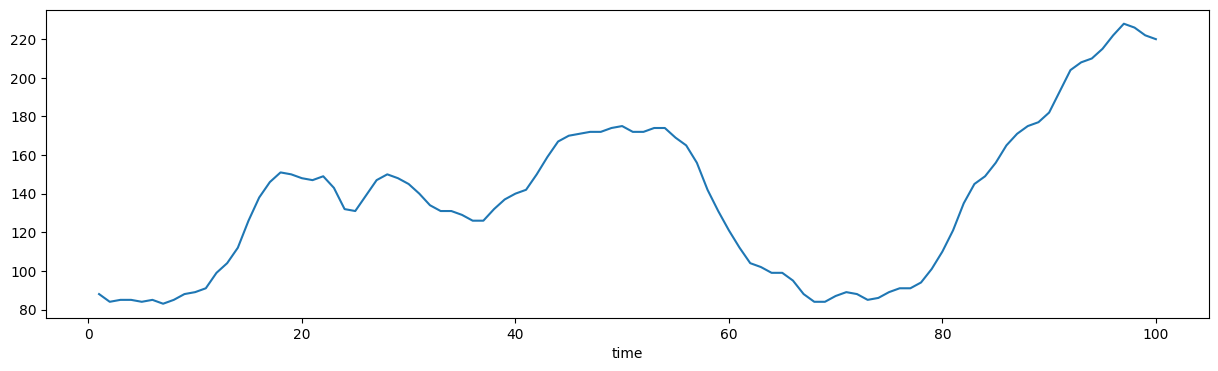

In [11]:
# Librerías
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot as plot_acf
# Leemos datos y dibujamos
series = pd.read_csv('https://raw.githubusercontent.com/jamovi/r-datasets/master/data/WWWusage.csv', header=0).set_index('time')['value']
series.plot(figsize=(15, 4))
plt.show()

---
## Estacionariedad

Podemos ver que existe una clara tendencia al alza en la venta del producto, lo cual en particular nos dice que no será estacionaria.

Una de las herramientas asociadas a series temporales que hemos analizado es la autocorrelación, la cual cobra una particular importancia en éstos procesos al ser dependientes de sí mismos. 

c:\Users\israe\OneDrive\Escritorio\Data Analist\Modulo0\BootCamp\venvdata_analytics\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


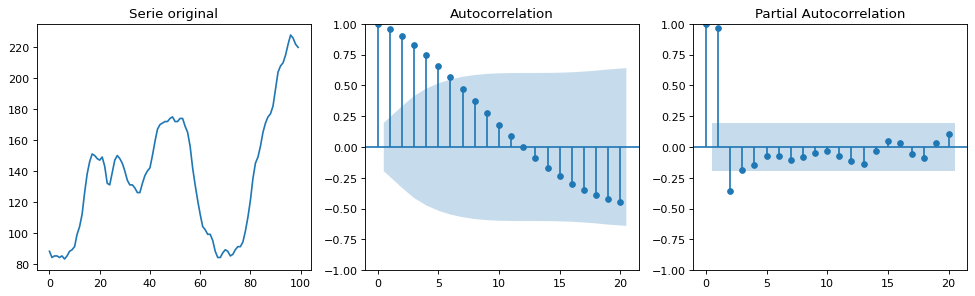

In [13]:
# Librerías
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Creamos gráfico
f = plt.figure(figsize=(15, 4), dpi=80)
# Preparamos primer componente
ax1 = f.add_subplot(131)
ax1.set_title('Serie original')
ax1.plot(series.values)
# Preparamos segundo componente
ax2 = f.add_subplot(132)
plot_acf(series.values, ax=ax2)
# Preparamos tercer componente
ax3 = f.add_subplot(133)
plot_pacf(series.values, ax=ax3)
plt.show()

Este gráfico nos indica que la correlación es positiva en los anteriores diez a doce términos, y llega a ser significativa a los cinco, aunque realmente precisamos estimar también el parámetro $d$ de diferenciación para obtener unos pronósticos fiables, ya que seguimos viendo una tendencia muy elevada. Veamos qué sucede al analizar la serie diferenciada una vez:



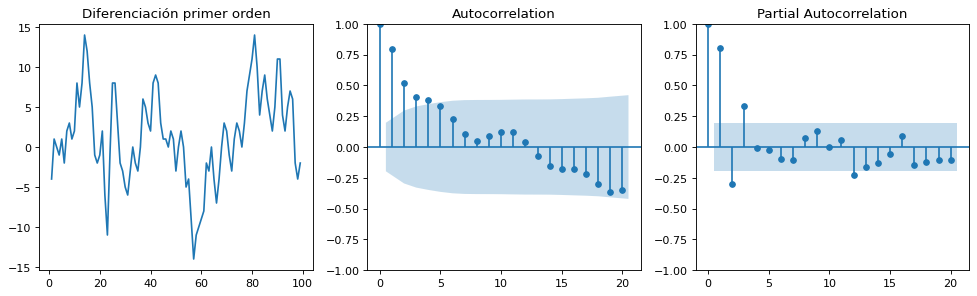

In [14]:
# Librerías
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Creamos gráfico
f = plt.figure(figsize=(15, 4), dpi=80)
# Preparamos primer componente
ax1 = f.add_subplot(131)
ax1.set_title('Diferenciación primer orden')
ax1.plot(series.diff().values)
# Preparamos segundo componente
ax2 = f.add_subplot(132)
plot_acf(series.diff().dropna(), ax=ax2)
# Preparamos tercer componente
ax3 = f.add_subplot(133)
plot_pacf(series.diff().dropna(), ax=ax3)
plt.show()

Vemos que haber diferenciado la serie ha eliminado bastante comportamiento indeseado. Probemos también ver qué ocurre al diferenciar de nuevo:

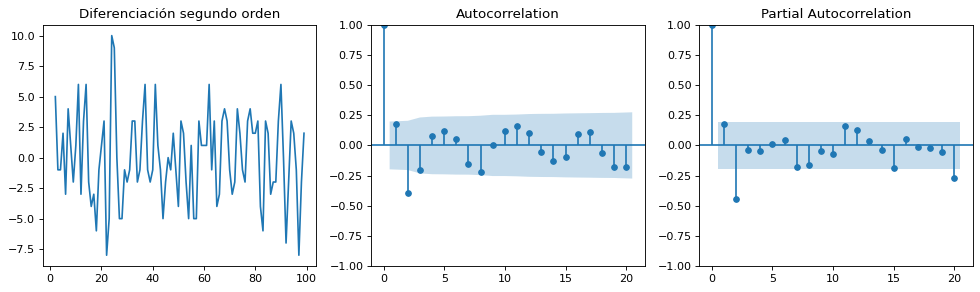

In [15]:
# Librerías
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Creamos gráfico
f = plt.figure(figsize=(15, 4), dpi=80)
# Preparamos primer componente
ax1 = f.add_subplot(131)
ax1.set_title('Diferenciación segundo orden')
ax1.plot(series.diff().diff().values)
# Preparamos segundo componente
ax2 = f.add_subplot(132)
plot_acf(series.diff().diff().dropna(), ax=ax2)
# Preparamos tercer componente
ax3 = f.add_subplot(133)
plot_pacf(series.diff().diff().dropna(), ax=ax3)
plt.show()

A partir del gráfico de autocorrelación, podemos decidir si se necesita más diferenciación. Si colectivamente las autocorrelaciones, o el punto de datos de cada rezago (en el eje horizontal), son positivos para varios rezagos consecutivos, es posible que se necesiten más diferencias. Por el contrario, si más puntos de datos son negativos, la serie está sobrediferenciada.

Se puede emplear una prueba más matemática para determinar qué orden es mejor para los datos en cuestión. La prueba *Dickey-Fuller* aumentada es una de esas medidas que statsmodel proporciona fácilmente. La prueba ADF tiene como objetivo rechazar la hipótesis nula de que los datos de la serie temporal dada no son estacionarios. Calcula el valor $p$ y lo compara con un valor umbral o nivel de significación de 0.05. Si el valor p es menor que este nivel, entonces los datos son estacionarios; de lo contrario, el orden de diferenciación se incrementa en uno.

*Prueba Augmented Dickey Fuller*


H0: Datos NO son estacionarios


p valor < 0.05 -> Datos SON estacionarios

In [15]:
# Librerías
from statsmodels.tsa.stattools import adfuller
# Resultados
print(f"p-valor diferenciación orden cero: {adfuller(series)[1]}")
print(f"p-valor diferenciación orden uno: {adfuller(series.diff().dropna())[1]}")
print(f"p-valor diferenciación orden dos: {adfuller(series.diff().diff().dropna())[1]}")

p-valor diferenciación orden cero: 0.12441935447109481
p-valor diferenciación orden uno: 0.07026846015272718
p-valor diferenciación orden dos: 2.8434287555471576e-17


Como podemos ver, el valor de diferenciación dos es el que supera la barrera del $p$-valor; sin embargo, dado que el valor uno está muy cerca del valor frontera, lo probaremos inicialmente.

---
## Orden autoregresivo y medias móviles

La siguiente cuestión es estudiar cuántos términos anteriores de la serie precisamos para realizar estimaciones con verosimilitud. Para ello, será de nuestra ayuda el gráfico de autocorrelación parcial, que precisamente analiza la correlación entre nuestra serie y los términos anteriores de la misma bajo un cierto *lag* constante.  Nótese que, en los gráficos de la sección anterior, ya hemos incluído la comentada gráfica, por lo que nos remitiremos a ella para analizar la serie. En efecto, el término de mayor significancia en todas ellas es el primero, en particular en el orden de diferenciación uno, que es el escenario que probaremos inicialmente, por lo que nuestra elección de $p$ será uno.

Finalmente, el parámetro $q$ que corresponde con la ventana de uso de medias móviles, al observar la cantidad de *lags* que cruzan el umbral, podemos determinar cuánto del pasado sería lo suficientemente significativo como para considerarlo en el futuro. Los de alta correlación aportan más y serían suficientes para predecir valores futuros. De los gráficos anteriores, el parámetro de promedio móvil (MA) se puede establecer en 2.

Tomaremos para ente ensayo, finalmente, un modelo $\text{ARIMA}(p=1,\,d=1,\,q=2)$.

---
## Modelización

In [16]:
# Librerías
from statsmodels.tsa.arima.model import ARIMA
# Cargamos datos
series = pd.read_csv('https://raw.githubusercontent.com/jamovi/r-datasets/master/data/WWWusage.csv', header=0).set_index('time')['value']
# Ajustamos modelo a datos
model = ARIMA(series.values, order=(1,1,2))
model_fit = model.fit()
# Resumen del entrenamiento
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -254.126
Date:                Sat, 01 Jul 2023   AIC                            516.253
Time:                        11:52:27   BIC                            526.633
Sample:                             0   HQIC                           520.453
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6976      0.130      5.365      0.000       0.443       0.952
ma.L1          0.4551      0.169      2.699      0.007       0.125       0.786
ma.L2         -0.0664      0.157     -0.424      0.6

Como podemos observar, el resumen del modelo proporciona varias medidas estadísticas para evaluar el rendimiento del mismo. Además, también conocemos los valores de los coeficientes para cada uno de los parámetros. Como mantuvimos el valor del parámetro MA o $q$ en 2, tenemos dos coeficientes entrenados para MA y uno para AR.

Aparte de eso, vemos puntuaciones como los criterios de información de *Akaike* (AIC), el criterio de información bayesiano (BIC), el criterio de información de *Hannan-Quinn* (HQIC) y la desviación estándar de las *innovaciones* (las *innovaciones* son la diferencia del valor real en el momento t y el valor predicho en ese momento).

Los criterios de información de *Akaike* son una buena medida para probar la bondad de cómo se ajusta matemáticamente el modelo. Las puntuaciones de los criterios de información miden la cantidad de información perdida al entrenar y generalizar el modelo ARIMA. El AIC debe ser lo más bajo posible. Al mostrar el resumen del modelo ARIMA entrenado de `statsmodel`, podemos verificar los puntajes de AIC y otras medidas de rendimiento estadístico.

Para reducir el AIC, podemos intentar cambiar los valores de $p$, $q$ y $d$ ó usar técnicas de entrenamiento como la validación cruzada de $k$. Por ejemplo, cambiar el valor de $d$ a dos en lugar de uno reduce el AIC significativamente:

In [18]:
# Ajustamos modelo a datos
model = ARIMA(series.values, order=(1,2,2))
model_fit = model.fit()
# Resumen del entrenamiento
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -252.594
Date:                Mon, 14 Nov 2022   AIC                            513.189
Time:                        19:10:20   BIC                            523.529
Sample:                             0   HQIC                           517.371
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6530      0.103      6.360      0.000       0.452       0.854
ma.L1         -0.4745      3.255     -0.146      0.884      -6.855       5.906
ma.L2         -0.5251      1.688     -0.311      0.7

Sin embargo, las medidas que incluyen AIC, BIC y HQIC dependen significativamente de la probabilidad aprendida de los datos. Al cambiar $d$ (entre 0, 1 y 2), cambiamos efectivamente la distribución de datos y, por lo tanto, el cálculo de probabilidad. No sería un método adecuado para determinar qué valor de $d$ debemos usar. Entonces, los diferentes AIC que obtuvimos al cambiar $d$ no son directamente comparables. Pero aun así, podemos ver en el parámetro mencionado en el método de selección anterior que $d=2$ sería una mejor opción en general.

Finalmente, una observación fundamental es comprobar la distribución de los marginales para comprobar que, en efecto, estadísticamente se pueden equiparar a un ruido blanco (esto es, a una distribución gaussiana centrada). Haremos uso de la funcionalidad recientemente añadida `plot_diagnostics`, que nos muestra (de izquierda a derecha y de arriba hacia abajo) la gráfica real del ruido, el histograma real y estimado, el gráfico de cuantiles y un correlograma:

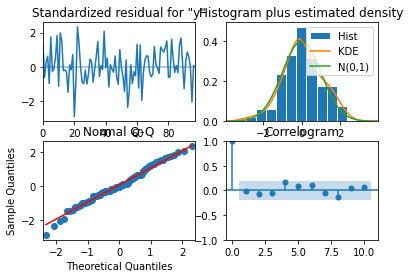

In [19]:
model_fit.plot_diagnostics()
plt.show()

---
## Predicciones y visualización

Para comprobar la calidad del ajuste del modelo entrenado a los datos de la serie temporal proporcionados, podemos usar el método `predict` del modelo ARIMA entrenado para trazar los valores reales y pronosticados uno encima del otro. Este gráfico lineal se calcula a partir de los pesos aprendidos y entrenados por el modelo. Verifiquemos qué tan bien funciona la predicción en función de los coeficientes aprendidos:

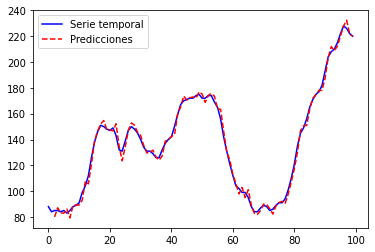

In [20]:
# Librerías
from statsmodels.tsa.arima.model import ARIMA
# Cargamos datos
series = pd.read_csv('https://raw.githubusercontent.com/jamovi/r-datasets/master/data/WWWusage.csv', header=0).set_index('time')['value']
p = 1 # Coeficientes de autoregresión
d = 2 # Orden de diferenciación
q = 2 # Ajuste media móvil
# Ajustamos modelo a datos
model = ARIMA(series.values, order=(p,d,q))
model_fit = model.fit()
# Tomamos predicciones
preds = model_fit.predict()
# Creamos figura
fig, ax = plt.subplots()
ax.plot(range(len(series)), series.values, 'b-')
ax.plot(range(d,len(series)), preds[d:], 'r--')
plt.legend(['Serie temporal', 'Predicciones'])
plt.show()

Obsérvese que, como es evidente, el modelo no realiza predicciones *razonables* hasta que superemos, al menos, el margen de diferenciación y/o estipulado por las medias móviles empleadas para la modelización. En este caso, como se realiza una diferenciación y media móvil de orden dos, será a partir del tercer término cuando podamos empezar a disponer de valores de referencia.

Por otra parte, a la hora de realizar predicciones sobre nuestro modelo, `ARIMA` emplea lo que se conoce como el método de las ventanas deslizantes, junto con la *walk-forward validation*; explicaremos lo que es cada concepto:

* *Sliding windows*: Este método consiste en, iterativamente, emplear una cantidad determinada de pasos temporales para hacer predicciones a posteriori ([fuente de la imagen](https://docs.wavefront.com/query_language_windows_trends.html)).

    <img src="https://docs.wavefront.com/images/5sec_moving_window.png" alt="drawing" style="width:600px;"/>
    
* *Walk-forward validation*: Consiste en, a medida que avanzamos en el tiempo, ir haciendo predicciones dle futuro en base a todos los datos anteriores de los que estamos provistos ([fuente de la imagen](https://alphascientist.com/walk_forward_model_building.html)).

    <img src="https://alphascientist.com/images/walkforward.png" alt="drawing" style="width:600px;"/>

De esta forma, iterativamente nuestro modelo se irá enriqueciendo de más y más datos gracias a la estrategia *walk-forward validation*, haciendo uso del método de las ventanas deslizantes. Finalmente, para ver cuán acertadas o erróneas son las predicciones, podemos hacer uso puntualmente de cualquier métrica que se emplea en problemas de regresión:

Predicho=89.521603, Valor real=88.000000
Predicho=82.080035, Valor real=84.000000
Predicho=81.589952, Valor real=84.000000
Predicho=84.685487, Valor real=87.000000
Predicho=89.883306, Valor real=89.000000
Predicho=89.828715, Valor real=88.000000
Predicho=86.310819, Valor real=85.000000
Predicho=82.133014, Valor real=86.000000
Predicho=88.306746, Valor real=89.000000
Predicho=91.183194, Valor real=91.000000
Predicho=92.142568, Valor real=91.000000
Predicho=90.410245, Valor real=94.000000
Predicho=97.571102, Valor real=101.000000
Predicho=107.112579, Valor real=110.000000
Predicho=117.284441, Valor real=121.000000
Predicho=130.219960, Valor real=135.000000
Predicho=147.152094, Valor real=145.000000
Predicho=151.113163, Valor real=149.000000
Predicho=150.910098, Valor real=156.000000
Predicho=163.423864, Valor real=165.000000
Predicho=173.124217, Valor real=171.000000
Predicho=174.787596, Valor real=175.000000
Predicho=178.086628, Valor real=177.000000
Predicho=178.090325, Valor real=182.

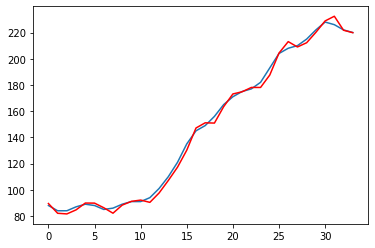

In [21]:
# Partimos datos para asegurar una validación final
# en datos test
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# Walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,2,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('Predicho=%f, Valor real=%f' % (yhat, obs))
# Evaluamos los resultados
metric = lambda x,y : np.sqrt(np.mean((x-y)**2))
rmse = np.sqrt(metric(test, predictions))
print('Test RMSE: %.3f' % rmse)
# Dibujamos valor real y predicho
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

---
---
# NeuralProphet

`NeuralProphet` es una implementación de `PyTorch` de una herramienta de pronóstico de series de tiempo fácil de usar para profesionales basada en redes neuronales. Esto está fuertemente influenciado por `Prophet`, una popular herramienta de pronóstico desarrollada por *Meta*. `NeuralProphet` se basa en una arquitectura completamente modular que le permite crecer en el futuro a medida que se agregan nuevos componentes. Esta es una herramienta de pronóstico fácil de usar que mantiene los objetivos originales de `Prophet`, como la interpretabilidad y la configurabilidad, al tiempo que agrega nuevas funciones, como capacidades de diferenciación automática, mediante el uso de `PyTorch` como backend.

Algunas de las muchas ventajas de utilizar esta herramienta son:

* Auto-regresión y covarianzas están soportadas.
* La elección de hiperparámetros está automatizada.
* Se realiza un análisis de temporalidad con transformadas de Fourier a varios niveles (hora, día, semana, mes,...).
* Herramientas de regularización tales como *Autoencoders*.
* Customización de funciones de pérdida.



In [22]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neuralprophet import NeuralProphet
# Lectura de datos
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv')
# Renombramos columnas (deben llamarse exactamente así)
df.rename(columns = {'date':'ds', 'value':'y'}, inplace = True)
# Cambiamos formato a fechas
df['ds'] = pd.DatetimeIndex(df['ds'])
# Mostramos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


Haremos un modelo simple con `NeuralProphet` para este conjunto de datos, que se puede ajustar creando un objeto de la clase `NeuralProphet`. Aquí, la frecuencia del conjunto de datos es mensual, por lo que ajustaremos el cambio del parámetro de frecuencia en consecuencia.

Todos los parámetros están establecidos por defecto por `NeuralProphet`. La validación del modelo para NeuralProphet se puede hacer  especificando la fracción de datos que se utilizará para la validación en el argumento `valid_p`:

In [23]:
import numpy as np 
asd = np.array([0,1])

In [27]:
# Instanciamos clase
m = NeuralProphet()
# Partimos datos especificando unidad mínima de tiempo
df_train, df_val = m.split_df(df, freq='M', valid_p = 0.2)
# Entrenamos modelo
metrics = m.fit(df_train, freq='M', validation_df=df_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.517% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO 

  0%|          | 0/108 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.24E-02, min: 4.41E-01


  0%|          | 0/108 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.32E-02, min: 4.41E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.10E-02
  0%|          | 0/492 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - c:\Users\Andres\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:928: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)

Epoch[492/492]: 100%|██████████| 492/492 [00:28<00:00, 17.17it/s, SmoothL1Loss=0.00143, MAE=12.5, RMSE=16.4, Loss=0.00106, RegLoss=0, MAE_val=71.7, RMSE_val=90, SmoothL1Loss_val=0.0418]  


Un sencillo análisis de los errores del modelo se puede hacer a partir del objeto desprendido del entrenamiento:

<AxesSubplot:>

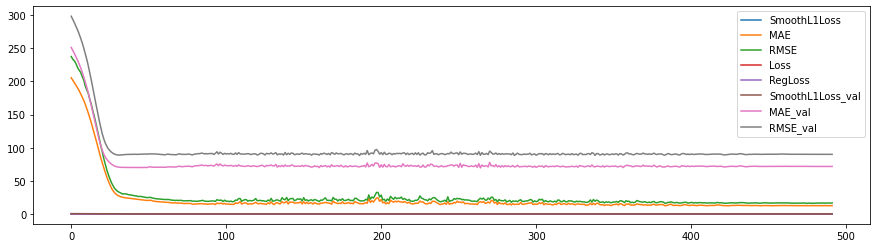

In [28]:
metrics.plot(figsize=(15,4))

Una vez ha concluido el entrenamiento, podemos realizar como en el caso anterior predicciones fácilmente:

In [29]:
future = m.make_future_dataframe(df, periods=24, n_historic_predictions=len(df))
forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.071% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.071% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


Finalmente, si exploramos el objeto recientemente calculado `forecast`, podemos observar que contiene información similar para replicar el análisis gráfico proporcionado por ARIMA:

In [30]:
forecast.head()

,ds,y,residual1,yhat1,trend,season_yearly
0,1949-01-01,112,-10.964241,101.035759,125.570145,-24.534391
1,1949-02-01,118,-24.889572,93.110428,125.946228,-32.835800
2,1949-03-01,132,-5.475128,126.524872,126.285904,0.238960
3,1949-04-01,129,-10.901794,118.098206,126.661987,-8.563781
4,1949-05-01,121,-1.336113,119.663887,127.025932,-7.362040


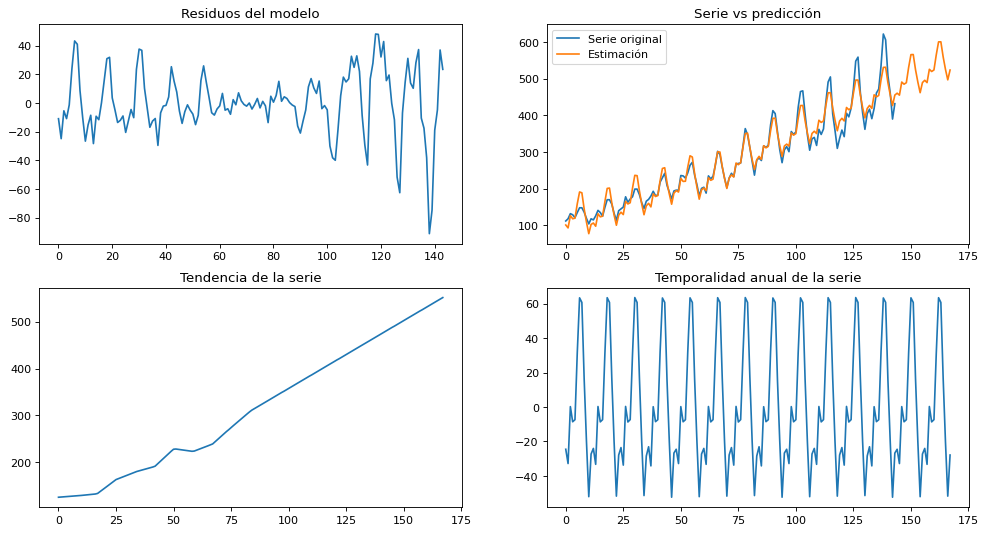

In [31]:
# Creamos gráfico
f = plt.figure(figsize=(15, 8), dpi=80)
# Preparamos primer componente
ax1 = f.add_subplot(221)
ax1.set_title('Residuos del modelo')
ax1.plot(forecast['residual1'])
# Preparamos segundo componente
ax2 = f.add_subplot(222)
ax2.set_title('Serie vs predicción')
ax2.plot(forecast['y'])
ax2.plot(forecast['yhat1'])
ax2.legend(['Serie original', 'Estimación'])
# Preparamos tercer componente
ax3 = f.add_subplot(223)
ax3.set_title('Tendencia de la serie')
ax3.plot(forecast['trend'])
# Preparamos cuarto componente
ax4 = f.add_subplot(224)
ax4.set_title('Temporalidad anual de la serie')
ax4.plot(forecast['season_yearly'])

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Transformación de datos

In [ ]:
df["date"] = pd.to_datetime(["date"],format = "%Y-%m") #Cambiamos la fecha a formato fecha

In [21]:
df.index = df["date"]
del df["date"]
df

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### Importar Librerias

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Gráficos EDA

Text(0, 0.5, 'Num of passengers')

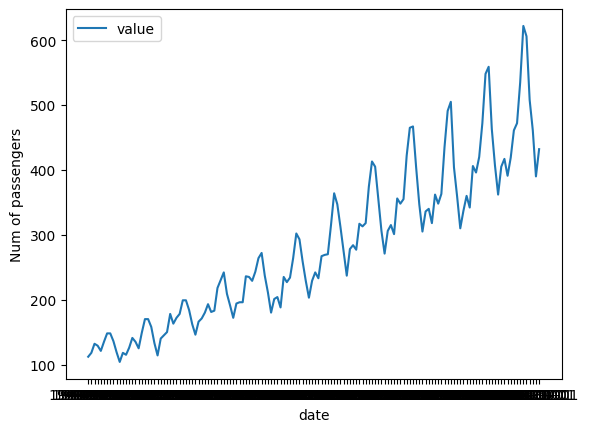

In [24]:
sns.lineplot(df)
plt.ylabel("Num of passengers")

### Estacionariedad

In [27]:
rolling_mu = df.rolling(7).mean() # Promedio cada 7 meses
rolling_sigma = df.rolling(7).std()  #Desviación estándar cada 7 meses

Text(0.5, 1.0, 'Passenger Time Series, Rolling Mean, Standard Deviation')

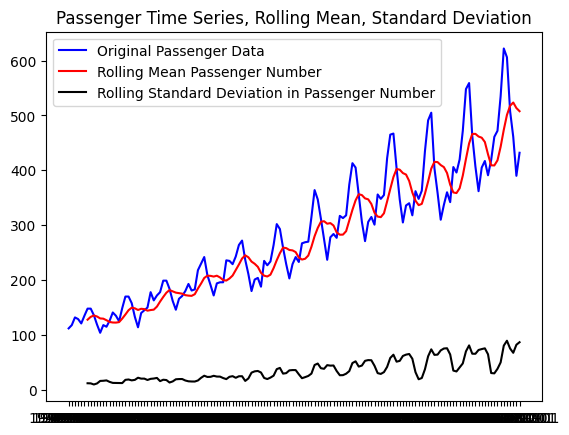

In [29]:
plt.plot(df, color="blue",label="Original Passenger Data")
plt.plot(rolling_mu, color="red", label="Rolling Mean Passenger Number")
plt.plot(rolling_sigma, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.legend( loc = "best") #Truquito para colocarlo en la mejor posición
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")

### Test de Augmented Dickey Fuller (ADF)

In [30]:
adft = adfuller(df,autolag="AIC")

In [34]:
output_adf = pd.DataFrame({"Metric": ["p_value","number of lags"],"Value": [adft[1],adft[2]]})
output_adf

,Metric,Value
0,p_value,0.99188
1,number of lags,13.00000


Los datos de pasajeros NO son estacionarios

### Autocorrelación

In [36]:
for i in range(3,13,3):
    autocorrelation = df["value"].autocorr(lag = i)
    print(f"La autocorrelación para {i} meses es {autocorrelation}")

La autocorrelación para 3 meses es 0.837394765081794
La autocorrelación para 6 meses es 0.7839187959206183
La autocorrelación para 9 meses es 0.8278519011167602
La autocorrelación para 12 meses es 0.9905273692085446


### Descomposición

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

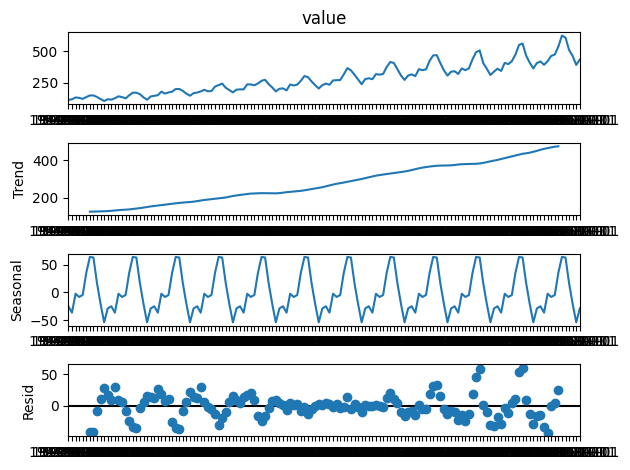

In [42]:
descomp = seasonal_decompose(df["value"], period = 12)
descomp.plot()
plt.show()